# Bought a Bike

My bike is 10 years old.  
It cost `$100`, but I still use it today.  
I wondered, **how profitably I invested** that `$100` in my bike?

## Profitablity Calc

I have prepared a simple calculator that can help to prevent spontaneous purchases.

The calculator needs the following input parameters:

- `purchase_name` - purchase name;
- `price` - purchase price;
- `usage_years` - how many years the purchase will be used;
- `usage_seasons` - what seasons the purchase will be used, `winter`, `spring`, `summer`, `autumn` are allowed;
- `usage_per_week` - how many times a week the purchase will be used;
- `price_sale_pct` - how much the purchase was later sold for.

In [1]:
# Import libs
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def profitability(purchase_name, price, usage_years, usage_seasons, usage_per_week, price_sale_pct=0):
    # Calculate number of weeks in season
    days = 0
    seasons = list(set(usage_seasons))
    for season in seasons:
        if season == 'winter':
            days += calendar.monthrange(1970, 12)[1]
            days += calendar.monthrange(1970, 1)[1]
            days += calendar.monthrange(1970, 2)[1]
        elif season == 'spring':
            days += calendar.monthrange(1970, 3)[1]
            days += calendar.monthrange(1970, 4)[1]
            days += calendar.monthrange(1970, 5)[1]
        elif season == 'summer':
            days += calendar.monthrange(1970, 6)[1]
            days += calendar.monthrange(1970, 7)[1]
            days += calendar.monthrange(1970, 8)[1]
        elif season == 'autumn':
            days += calendar.monthrange(1970, 9)[1]
            days += calendar.monthrange(1970, 10)[1]
            days += calendar.monthrange(1970, 11)[1]
        else:
            return 'ERROR: not a season! Add winter, spring, summer or autumn.'
    usage_weeks = days/7

    # How many times have used the purchase
    usage_num = round(usage_years * usage_weeks * usage_per_week)
    # Сost per use
    price_per_usage = round((price - price_sale_pct) / usage_num, 2)
    
    result = pd.DataFrame({'purchase_name':[purchase_name],
                           'price':[price],
                           'usage_years':[usage_years],
                           'usage_seasons':[usage_seasons],
                           'usage_per_week':[usage_per_week],
                           'price_sale_pct':[price_sale_pct],
                           'usage_num':[usage_num],
                           'price_per_usage':[price_per_usage]
                        })

    return result

## Example

Let's test the calculator to answer if my old bike is useful acquisition.

In [3]:
profitability('my old bike', 100, 10, ['spring', 'summer'], 2)

,purchase_name,price,usage_years,usage_seasons,usage_per_week,price_sale_pct,usage_num,price_per_usage
0,my old bike,100,10,"[spring, summer]",2,0,526,0.19


For 10 years now, I've been cycling twice a week in the spring and summer, and I "pay" 19 cents each time.
It seems to be a bargain.

One use can be understood as one hour of cycling or two hours, for example.

Let's try to reduce the usage years to 1. Leave only summer for cycling.

In [4]:
profitability('my old bike', 100, 1, ['summer'], 2)

,purchase_name,price,usage_years,usage_seasons,usage_per_week,price_sale_pct,usage_num,price_per_usage
0,my old bike,100,1,[summer],2,0,26,3.85


The cost of `$3.85` at a time (or an hour) is no longer so attractive.

## Profitability to Buy a Bike

Recently, I liked a new bike in the store.  
I could have made a spontaneous, thoughtless purchase, given into the mood.  
However, now I want to estimate how much the new bike will actually cost me. Let's do the calcs.

### Getting data
I will consider some of the uses for my new bike:

- I'll buy it in the store for `$400`.
- I'll use it 1, 2, 4, 5, 6, 7, 8, 9 or 10 years.
- I plan to cycle only in summer.
- I want to cycle, maybe once a week, or on weekends, or time to time, or on weekdays.
- I'm not going to sell it.

In [5]:
# Describe the purchase
purchase_name_b = 'bike'
price_b = 400
usage_years_b = [y/2 for y in range(2, 21, 1)] # from 1 to 10 years
usage_seasons_b = [['summer']] # cycling only in summer
usage_per_week_b = [1,2,3,5] # once a week, on weekends, time to time, on weekdays
price_sale_pct_b = 0 # do not sell

columns = ['purchase_name', 'price', 'usage_years',
           'usage_seasons', 'usage_per_week', 'profitability'
          ]

profitability_bike = pd.DataFrame()
for years in usage_years_b:
    for seasons in usage_seasons_b:
        for times in usage_per_week_b:
            pra_bike = profitability(purchase_name_b, price_b, years, seasons, times, price_sale_pct_b)
            profitability_bike = profitability_bike.append(pra_bike)
            
profitability_bike.head()

,purchase_name,price,usage_years,usage_seasons,usage_per_week,price_sale_pct,usage_num,price_per_usage
0,bike,400,1.0,[summer],1,0,13,30.77
0,bike,400,1.0,[summer],2,0,26,15.38
0,bike,400,1.0,[summer],3,0,39,10.26
0,bike,400,1.0,[summer],5,0,66,6.06
0,bike,400,1.5,[summer],1,0,20,20.00


In [6]:
profitability_bike.describe()

,price,usage_years,usage_per_week,price_sale_pct,usage_num,price_per_usage
count,76.0,76.00000,76.000000,76.0,76.000000,76.000000
mean,400.0,5.50000,2.750000,0.0,198.776316,4.237237
std,0.0,2.75681,1.488847,0.0,156.146051,4.834062
min,400.0,1.00000,1.000000,0.0,13.000000,0.610000
25%,400.0,3.00000,1.750000,0.0,79.000000,1.502500
50%,400.0,5.50000,2.500000,0.0,151.500000,2.645000
75%,400.0,8.00000,3.500000,0.0,266.250000,5.060000
max,400.0,10.00000,5.000000,0.0,657.000000,30.770000


In [7]:
profitability_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchase_name    76 non-null     object 
 1   price            76 non-null     int64  
 2   usage_years      76 non-null     float64
 3   usage_seasons    76 non-null     object 
 4   usage_per_week   76 non-null     int64  
 5   price_sale_pct   76 non-null     int64  
 6   usage_num        76 non-null     int64  
 7   price_per_usage  76 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 5.3+ KB


In [8]:
# Increase the number of rows to display
pd.set_option('display.max_rows', 100)

profitability_bike.sort_values(by='price_per_usage')

,purchase_name,price,usage_years,usage_seasons,usage_per_week,price_sale_pct,usage_num,price_per_usage
0,bike,400,10.0,[summer],5,0,657,0.61
0,bike,400,9.5,[summer],5,0,624,0.64
0,bike,400,9.0,[summer],5,0,591,0.68
0,bike,400,8.5,[summer],5,0,559,0.72
0,bike,400,8.0,[summer],5,0,526,0.76
0,bike,400,7.5,[summer],5,0,493,0.81
0,bike,400,7.0,[summer],5,0,460,0.87
0,bike,400,6.5,[summer],5,0,427,0.94
0,bike,400,6.0,[summer],5,0,394,1.02
0,bike,400,10.0,[summer],3,0,394,1.02


### Plotting price per usage

In [9]:
%matplotlib inline

# Turn on svg rendering
%config InlineBackend.figure_format = 'svg'

# Color palette for the blog
snark_palette = ['#e0675a', # red
                 '#5ca0af', # green
                 '#edde7e', # yellow
                 '#211c47' # dark blue
                ]

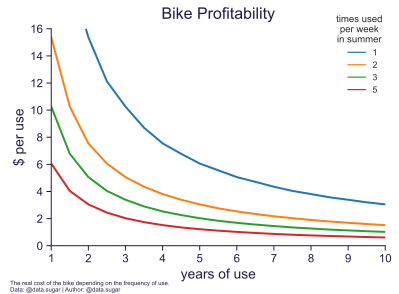

In [10]:
# Color palette for the data
palette = 'tab10'

# Inscriptions
title = """Bike Profitability"""
description = """
The real cost of the bike depending on the frequency of use.
Data: @data.sugar | Author: @data.sugar
"""

# Plot size
figsize = (6,4)

# Set the figure
sns.set(context='paper', style='ticks', palette=snark_palette,
        rc={'axes.spines.left': True, 'axes.spines.bottom': True,
            'axes.spines.right': False, 'axes.spines.top': False
           }
       )

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='w')
sns.lineplot(data=profitability_bike,
             x='usage_years', y='price_per_usage',
             hue='usage_per_week',
             lw=2, palette=palette,
             legend='full', ax=ax
            )

# Set some aesthetic params for the plot
ax.set_title(title, fontdict={'fontsize': 16}, loc='center', pad=10, c=snark_palette[-1]) # set a title of the plot
ax.annotate(description, xy=(10, -4), size=6, xycoords='figure points', c=snark_palette[-1])
ax.set_xlabel('years of use', loc='center', size='x-large', c=snark_palette[-1]) # set label of x axis
ax.set_ylabel('$ per use', loc='center', size='x-large', c=snark_palette[-1]) # set label of y axis
ax.tick_params(axis='both', labelsize='large', colors=snark_palette[-1]) # set x/y ticks
ax.spines['bottom'].set_color(snark_palette[-1]) # color x axis
ax.spines['left'].set_color(snark_palette[-1]) # color y axis
ax.set_xticks([i for i in range(1, 11)]) # set x ticks labels
ax.set_xlim(1,10)
ax.set_ylim(0, 16)
ax.legend(loc='upper right', frameon=False).texts[0].set_text('')
ax.text(s='times used\nper week\nin summer', x=9.3, y=15, ha='center')

# Save and plot
plt.savefig('plot.pic/plot.bike.png', dpi=150, bbox_inches='tight')
plt.show()

### Do I need a bike?

If renting a bike in my city costs `$1` an hour, then I have to cycle whole summer for at least 6 years to justify the purchase.

# Blog Post

In [11]:
blog_post = r"""
## 🚴‍♀️Do I need a bike?  


My \#bike is 10 years old.  
It cost \$100, but I still use it today.   

👀Thinking about \#conscious \#consumption I wondered how profitably I invested that \$100 in my bike?  

📌I have prepared a simple \#calculator that can help to prevent spontaneous purchases.  

I have tested it to answer if my old bike is \#useful acquisition.

✔For 10 years now, I've been cycling twice a week in the spring and summer, and I "pay" 19 cents each time.  
It seems to be a bargain.

✔What if reduce the usage years to 1 and leave only summer for cycling?  
The cost has increased to $3.85 at a time (or an hour) and is no longer so attractive.

✔One use can be understood as one hour of cycling or two hours, for example.

🤍Recently, I liked a new bike in the store.
I could have made a spontaneous, thoughtless purchase, given into the mood.
However, now I would like to estimate how much the new bike will actually cost me.  
So I did the calcs.

I considered some of the uses for my new bike:

◽I'll buy it in the store for \$400.  
◽I'll use it 1, 2, 4, 5, 6, 7, 8, 9 or 10 years.  
◽I plan to cycle only in summer.  
◽I want to cycle, maybe once a week, or on weekends, or time to time, or on weekdays.  
◽I'm not going to sell it.  

📝Do I still need a bike?  

If renting a bike in my city costs $1 an hour, then I have to cycle whole summer for at least 6 years to justify the purchase.  

(Need to calc your own purchases? Follow the link in bio for the profitability calc!)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_profit \#consciousconsumption
\#data_know_everything_and_nothing \#linkinbio \#datajournalism
"""

# Check post text length for Instagram
len(blog_post)

1673

In [12]:
from IPython.display import Markdown as md
md(blog_post)


## 🚴‍♀️Do I need a bike?  


My \#bike is 10 years old.  
It cost \$100, but I still use it today.   

👀Thinking about \#conscious \#consumption I wondered how profitably I invested that \$100 in my bike?  

📌I have prepared a simple \#calculator that can help to prevent spontaneous purchases.  

I have tested it to answer if my old bike is \#useful acquisition.

✔For 10 years now, I've been cycling twice a week in the spring and summer, and I "pay" 19 cents each time.  
It seems to be a bargain.

✔What if reduce the usage years to 1 and leave only summer for cycling?  
The cost has increased to $3.85 at a time (or an hour) and is no longer so attractive.

✔One use can be understood as one hour of cycling or two hours, for example.

🤍Recently, I liked a new bike in the store.
I could have made a spontaneous, thoughtless purchase, given into the mood.
However, now I would like to estimate how much the new bike will actually cost me.  
So I did the calcs.

I considered some of the uses for my new bike:

◽I'll buy it in the store for \$400.  
◽I'll use it 1, 2, 4, 5, 6, 7, 8, 9 or 10 years.  
◽I plan to cycle only in summer.  
◽I want to cycle, maybe once a week, or on weekends, or time to time, or on weekdays.  
◽I'm not going to sell it.  

📝Do I still need a bike?  

If renting a bike in my city costs $1 an hour, then I have to cycle whole summer for at least 6 years to justify the purchase.  

(Need to calc your own purchases? Follow the link in bio for the profitability calc!)  
.  
.  
.  
\#funtime \#probably \#datascience \#datapower \#data_sugar_profit \#consciousconsumption
\#data_know_everything_and_nothing \#linkinbio \#datajournalism
